## import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)

In [3]:
print(
    f'Shape of Train images: {train_images.shape}\n'
    f'Shape of Train labels: {train_labels.shape}\n\n'
    f'Shape of Test images: {test_images.shape}\n'
    f'Shape of Test labels: {test_labels.shape}'
)

Shape of Train images: (60000, 28, 28)
Shape of Train labels: (60000,)

Shape of Test images: (10000, 28, 28)
Shape of Test labels: (10000,)


In [4]:
print(f'Train labels: {train_labels}')

Train labels: [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [5]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset:



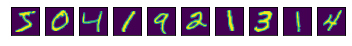


Train labels match with Train label sequentialy:
[5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 Train images in MNIST dataset:\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()

print(f'\nTrain labels match with Train label sequentialy:\n{train_labels[:10]}')

## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [7]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [8]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # layer 1 
                    keras.layers.MaxPool2D((2, 2)),                                                 # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation='softmax')])                                  # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # layer 1 
                    keras.layers.MaxPool2D((2, 2)),                                                 # layer 2
                    keras.layers.Conv2D(64, (3, 3), activation='relu'),                             # layer 3 
                    keras.layers.MaxPool2D((2, 2)),                                                 # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation='softmax')])                                  # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # layer 1
                    keras.layers.MaxPool2D((2, 2)),                                                 # layer 2
                    keras.layers.Conv2D(64, (3, 3), activation='relu'),                             # layer 3
                    keras.layers.Conv2D(64, (3, 3), activation='relu'),                             # layer 4
                    keras.layers.MaxPool2D((2, 2)),                                                 # layer 5
                    keras.layers.Conv2D(128, (3, 3), activation='relu'),                            # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation='softmax')])                                  # layer 7
    
    return model

### Create model for each example type

In [9]:
model1 = select_model(1)
model2 = select_model(2)
model3 = select_model(3)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [13]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [14]:
model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5176 - accuracy: 0.9409
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0846 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0706 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0568 - accuracy: 0.9834


In [15]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3785 - accuracy: 0.9437
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0715 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0581 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0509 - accuracy: 0.98490s - l
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0429 - accuracy: 0.9868


In [16]:
model3.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1664 - accuracy: 0.9561
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0542 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0432 - accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0313 - accuracy: 0.9907


## Test Step 
## Perform Test with Test data 

In [17]:
test_loss, accuracy = model1.evaluate(test_images, test_labels, verbose=2)
print(
    f'\nTest loss: {test_loss}\n'
    f'Test accuracy: {accuracy}'
)

313/313 - 1s - loss: 0.1430 - accuracy: 0.9682

Test loss: 0.14302192628383636
Test accuracy: 0.9682000279426575


In [18]:
test_loss, accuracy = model2.evaluate(test_images, test_labels, verbose=2)
print(
    f'\nTest loss: {test_loss}\n'
    f'Test accuracy: {accuracy}'
)

313/313 - 1s - loss: 0.0517 - accuracy: 0.9857

Test loss: 0.05169610679149628
Test accuracy: 0.9857000112533569


In [19]:
test_loss, accuracy = model3.evaluate(test_images, test_labels, verbose=2)
print(
    f'\nTest loss: {test_loss}\n'
    f'Test accuracy: {accuracy}'
)

313/313 - 2s - loss: 0.0657 - accuracy: 0.9792

Test loss: 0.06566966325044632
Test accuracy: 0.979200005531311


## Before prediction, change test image's type to float 32. 

In [20]:
test_images_float32 = tf.cast(test_images, tf.float32)
pred1 = model1.predict(test_images_float32)
pred2 = model2.predict(test_images_float32)
pred3 = model3.predict(test_images_float32)
Number = list(range(0, 10))

In [21]:
print(
    f'Prediction: {pred1.shape}\n'
    f'Test labels: {test_labels.shape}'
)

Prediction: (10000, 10)
Test labels: (10000,)


## Functions for plot images, probability

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [23]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Results for first image in the dataset

In [24]:
def plot_first_image(predictions_array):
    i = 0
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions_array, test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions_array, test_labels)
    plt.show()

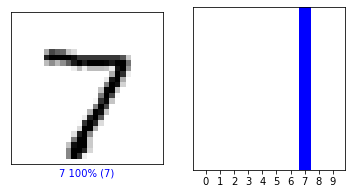

In [25]:
plot_first_image(pred1)

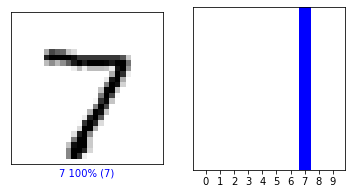

In [26]:
plot_first_image(pred2)

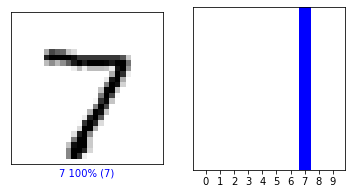

In [27]:
plot_first_image(pred3)

### Results for first 15 images

In [28]:
def plot_first_fifteen_images(predictions_array):
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i + 1)
        plot_image(i, predictions_array, test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i + 2)
        plot_value_array(i, predictions_array, test_labels)
    plt.show()

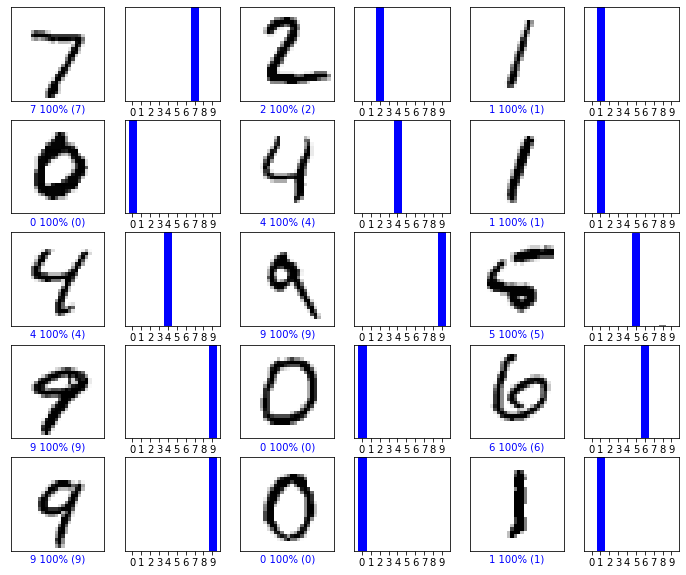

In [29]:
plot_first_fifteen_images(pred1)

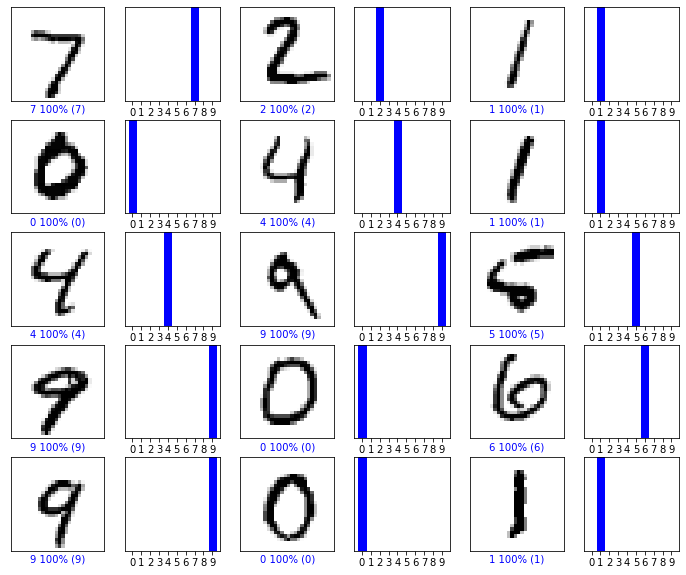

In [30]:
plot_first_fifteen_images(pred2)

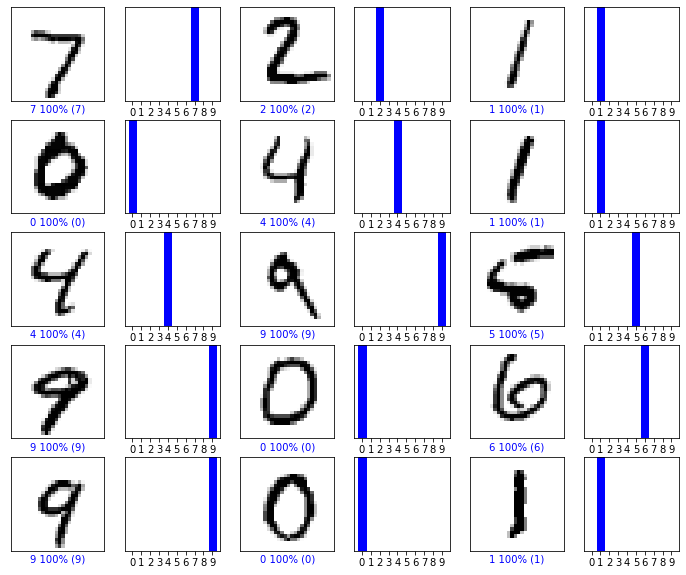

In [31]:
plot_first_fifteen_images(pred3)

## Plot images and probability that model predicted wrong

In [32]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [33]:
def plot_ten_wrong_images(predictions_array):
    indices = error_mnist(predictions_array, test_labels)
    first_ten = indices[:10]
    print(f"{first_ten} (out of {len(indices)} wrong predictions)")
    plot_error(first_ten, predictions_array, test_labels)

[62, 92, 96, 119, 211, 247, 259, 282, 321, 337] (out of 318 wrong predictions)


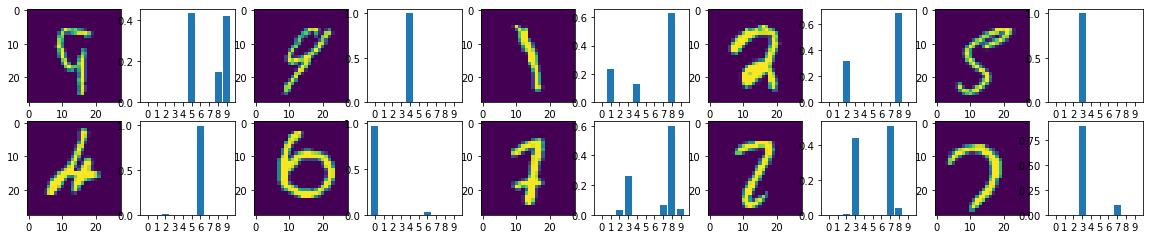

In [34]:
plot_ten_wrong_images(pred1)

[18, 115, 247, 259, 321, 449, 495, 582, 583, 659] (out of 143 wrong predictions)


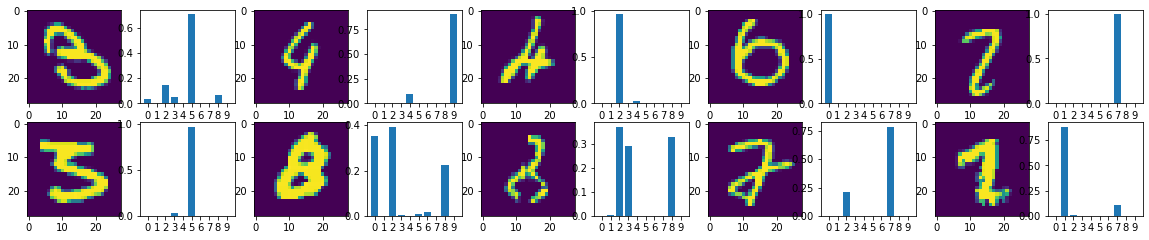

In [35]:
plot_ten_wrong_images(pred2)

[89, 115, 149, 321, 326, 435, 445, 447, 449, 450] (out of 208 wrong predictions)


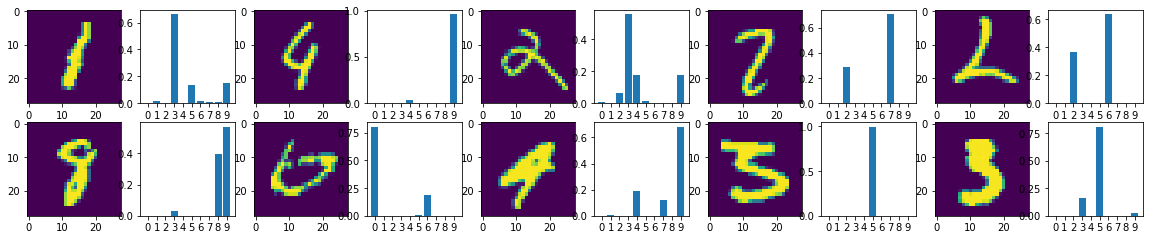

In [36]:
plot_ten_wrong_images(pred3)